In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
digit_data = pd.read_csv('digit_train.csv')
digit_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
digit_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# 42000개 손글씨 데이터 
# 정답포함해서 785개의 컬럼이 있음
# 정답 제외 784개컬럼이 존재 = 28*28 = 784
digit_data.shape

(42000, 785)

In [6]:
img0 = digit_data.iloc[0,1:]

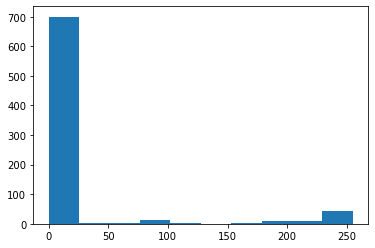

In [7]:
plt.hist(img0)
plt.show()

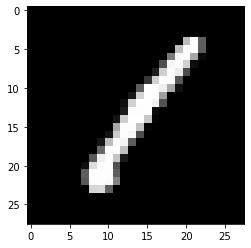

In [8]:
#0:보라색계열
#노란색:250
#보라색에 가까우면 0에 가까운 숫자
#노란색에 가까우면 250에 가까운 숫자
plt.imshow(img0.values.reshape(28,28),cmap='gray')
plt.show()

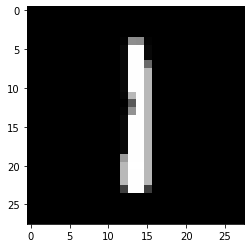

In [9]:
# 2번 이미지 확인
# 검은색이 0
# 흰색이 250
img1 = digit_data.iloc[2,1:]
plt.imshow(img1.values.reshape(28,28),cmap='gray')
plt.show()

In [10]:
X = digit_data.iloc[:5000,1:]
y = digit_data.iloc[:5000,0]


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size = 0.3,
                                                random_state = 3)

In [12]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()
logi.fit(X_train,y_train)
print("train score : ",logi.score(X_train,y_train))
print("test score : ",logi.score(X_test,y_test))

train score :  1.0
test score :  0.8573333333333333


C:\Users\SM2127\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train,y_train)
print("train score : ",svm.score(X_train,y_train))
print("test score : ",svm.score(X_test,y_test))

train score :  0.9968571428571429
test score :  0.834


C:\Users\SM2127\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [14]:
#50:2
#51:1
#predict_proba 해당값을 몇퍼센트 예측했는지 판단
logi.predict_proba(X_test[50:52])

array([[1.17481376e-55, 6.22494889e-31, 1.00000000e+00, 5.00447486e-40,
        3.00015210e-60, 9.14324093e-50, 7.88925999e-58, 1.77347006e-88,
        3.20842665e-29, 8.90047010e-65],
       [4.41194556e-76, 1.00000000e+00, 1.66341265e-16, 1.63544408e-23,
        1.73327541e-57, 1.55998713e-20, 4.91663195e-26, 2.46789457e-38,
        1.90356809e-13, 2.32083197e-34]])

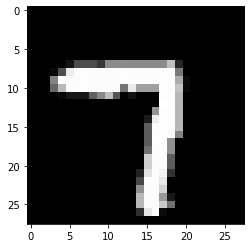

In [21]:
img50 = X_test.iloc[13]
plt.imshow(img50.values.reshape(28,28),cmap='gray')
plt.show()

- 분류평가지표 확인하기

In [16]:
from sklearn.metrics import classification_report

In [17]:
pre_logi = logi.predict(X_test)
#precision - 정밀도
# recall-재현율
#f1-score
#support-개수
print(classification_report(pre_logi,y_test))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       157
           1       0.96      0.94      0.95       174
           2       0.78      0.85      0.81       168
           3       0.87      0.81      0.84       143
           4       0.89      0.83      0.86       134
           5       0.73      0.77      0.75       139
           6       0.95      0.88      0.91       169
           7       0.89      0.90      0.89       156
           8       0.74      0.85      0.79       123
           9       0.82      0.83      0.83       137

    accuracy                           0.86      1500
   macro avg       0.86      0.85      0.85      1500
weighted avg       0.86      0.86      0.86      1500

